In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happy_df=pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
happy_df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

In [4]:
# rename columns to a user readable format
old_name = list(happy_df.columns)
new_name = ['happiness','delivered_OnTime', 'order_satisfaction', 'order_completed', 'price_satisfaction', 
            'courier_satisfaction', 'app_satisfaction']

happy_df.rename(columns = (dict(zip(old_name, new_name))), inplace = True)
happy_df.head()

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
happy_df.shape

(126, 7)

In [6]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   happiness             126 non-null    int64
 1   delivered_OnTime      126 non-null    int64
 2   order_satisfaction    126 non-null    int64
 3   order_completed       126 non-null    int64
 4   price_satisfaction    126 non-null    int64
 5   courier_satisfaction  126 non-null    int64
 6   app_satisfaction      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
happy_df.describe(include = "all")

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
## skewness and kurtosis

print("Skewness: ", "\n", happy_df.skew())
print(" ")
print("Kurtosis: ", "\n", happy_df.kurtosis())

Skewness:  
 happiness              -0.193659
delivered_OnTime       -1.058468
order_satisfaction      0.271000
order_completed        -0.199536
price_satisfaction     -0.422240
courier_satisfaction   -0.699999
app_satisfaction       -0.957590
dtype: float64
 
Kurtosis:  
 happiness              -1.994412
delivered_OnTime        1.024968
order_satisfaction     -0.601168
order_completed        -0.111410
price_satisfaction      0.278617
courier_satisfaction   -0.306418
app_satisfaction        0.941835
dtype: float64


In [9]:
## Check Multicollinearity

happy_df.corr(method = "pearson")

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
happiness,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
delivered_OnTime,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
order_satisfaction,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
order_completed,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
price_satisfaction,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
courier_satisfaction,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
app_satisfaction,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [10]:
## Check Multicollinearity

happy_df.corr(method = "pearson") > 0.85

,happiness,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
happiness,True,False,False,False,False,False,False
delivered_OnTime,False,True,False,False,False,False,False
order_satisfaction,False,False,True,False,False,False,False
order_completed,False,False,False,True,False,False,False
price_satisfaction,False,False,False,False,True,False,False
courier_satisfaction,False,False,False,False,False,True,False
app_satisfaction,False,False,False,False,False,False,True


In [11]:
for i in happy_df.columns:
    print(f'{i}: {happy_df[i].unique()}')

happiness: [0 1]
delivered_OnTime: [3 5 4 1]
order_satisfaction: [3 2 4 5 1]
order_completed: [3 2 4 5 1]
price_satisfaction: [4 5 3 2 1]
courier_satisfaction: [2 4 3 5 1]
app_satisfaction: [4 3 5 2 1]


# split data into training and testing

In [12]:
# Create our features
y = happy_df["happiness"]
X = happy_df.drop("happiness", axis=1)
X

,delivered_OnTime,order_satisfaction,order_completed,price_satisfaction,courier_satisfaction,app_satisfaction
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


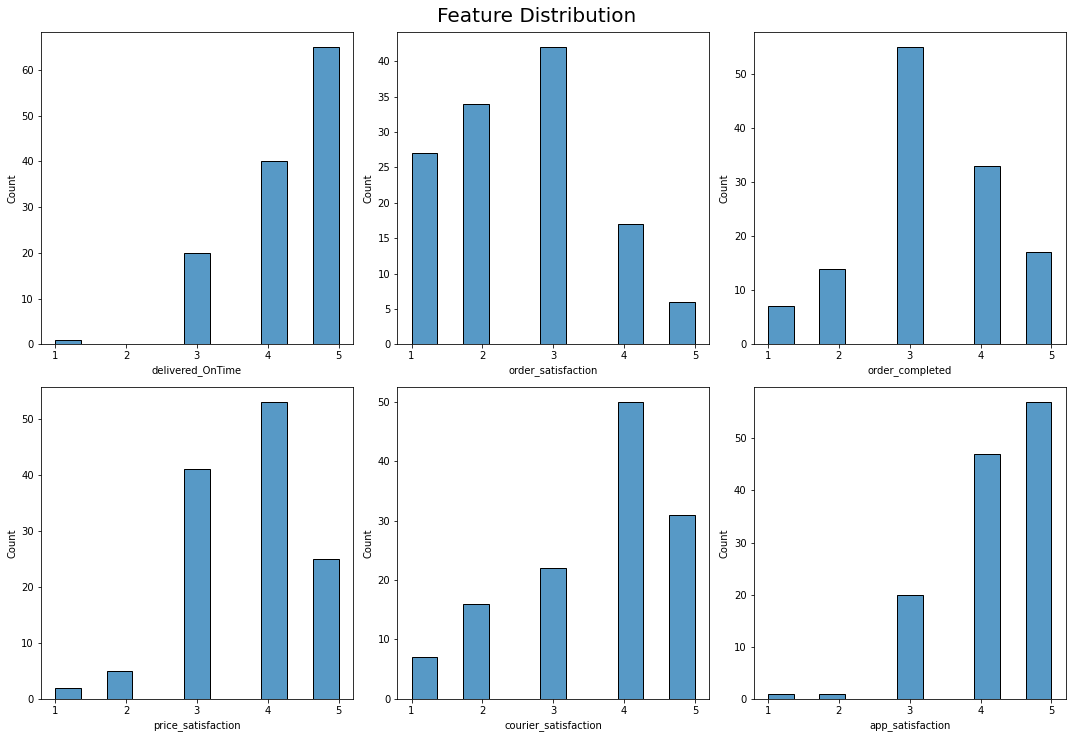

In [13]:
#plot feature distribution
feature = X.copy().iloc[:, 0:6]

plt.figure(figsize=(15, 10))

for i in range(len(feature.columns)):
    ax = plt.subplot(int(len(feature.columns)/3 ), 3,  i + 1)
    _ = sns.histplot(data=X, x=feature.columns[i], ax=ax)
    _ = plt.ylabel('Count')
    _ = plt.tight_layout()
    _= ax.set_xticks([1, 2, 3, 4, 5])

_ = plt.suptitle(f'Feature Distribution', y=1.02, size=20)
_ = plt.show()

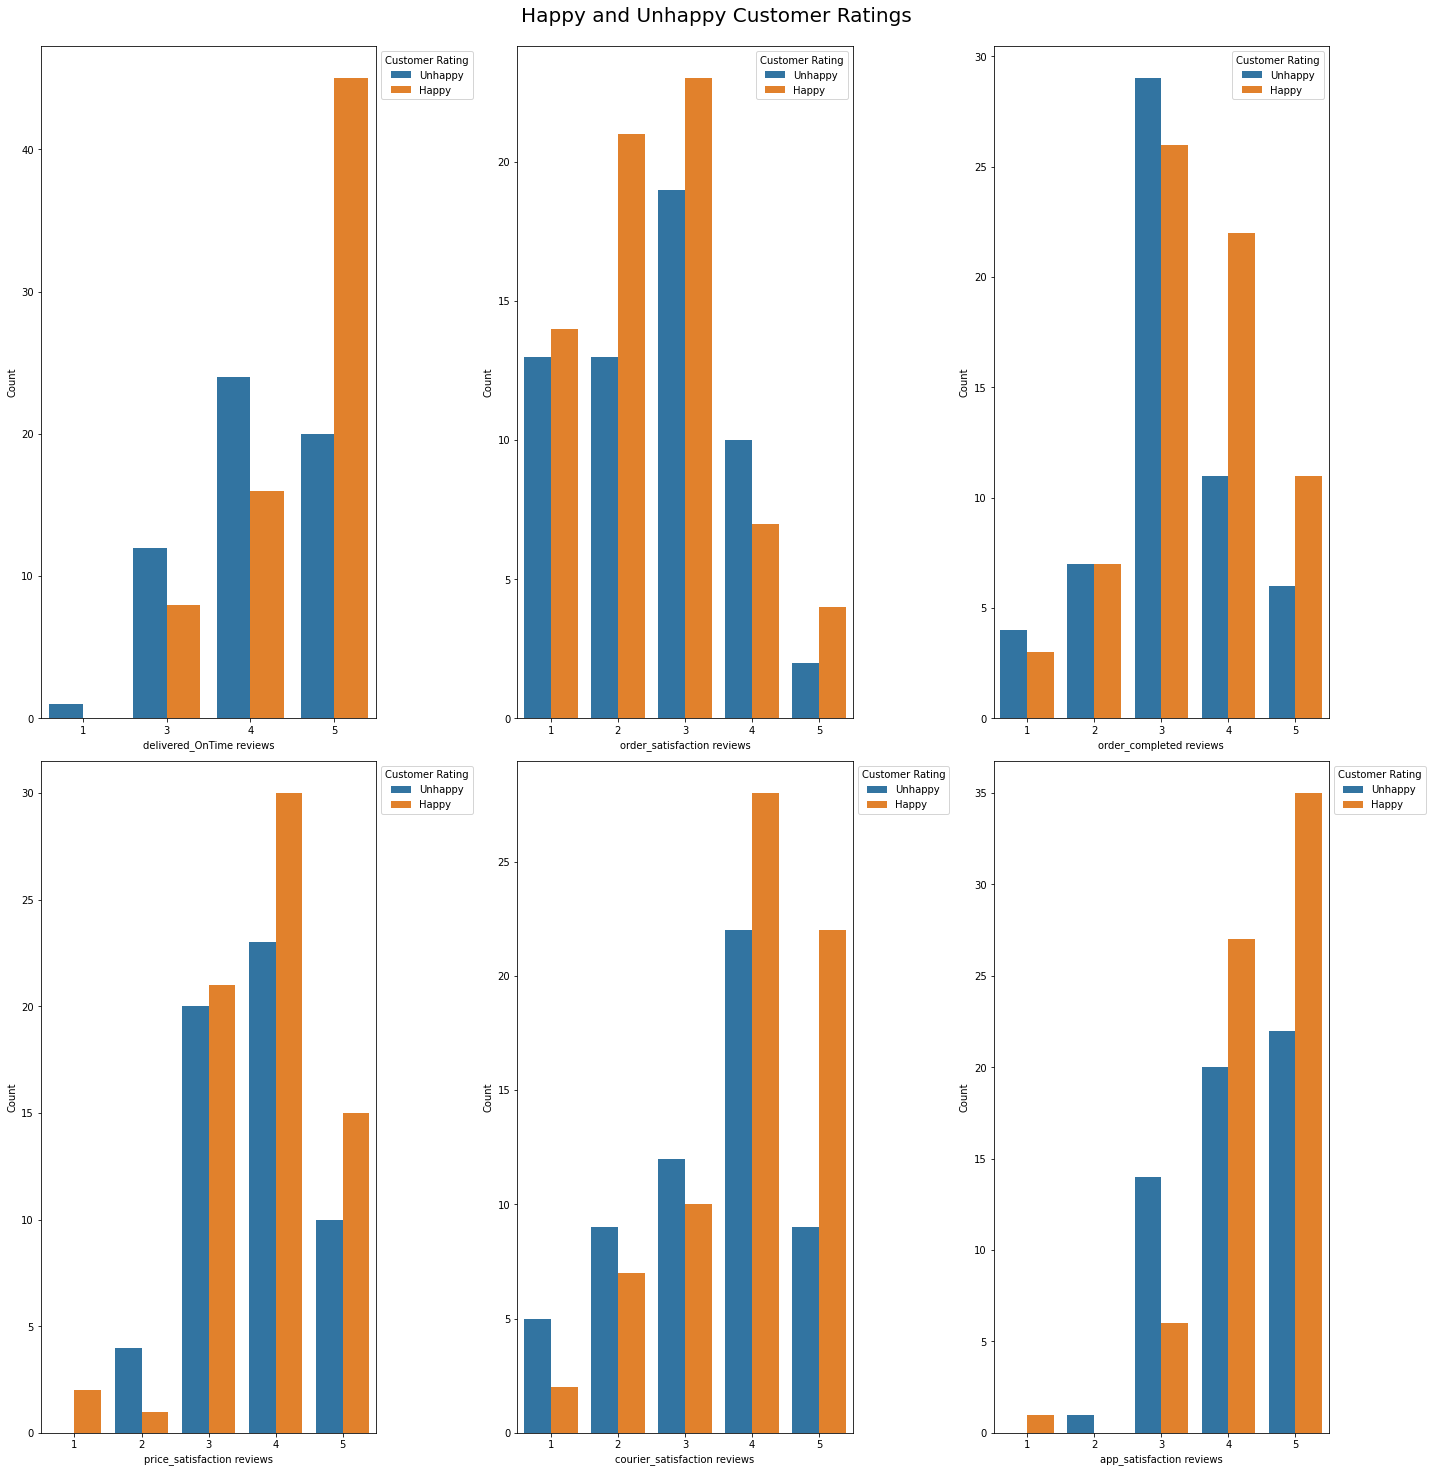

In [14]:
data = X.copy().iloc[:, 0:6]

plt.figure(figsize=(20, 20))

for i in range(len(data.columns)):
    ax = plt.subplot(int(len(data.columns) / 3), 3, i + 1)
    arr = sns.countplot(data=happy_df, x=data.columns[i], ax=ax, hue='happiness')
    legend_labels, _= ax.get_legend_handles_labels()
    _ = arr.legend(legend_labels, ['Unhappy','Happy'], bbox_to_anchor=(1,1), title='Customer Rating')
    _ = plt.xlabel(f'{data.columns[i]} reviews')
    _ = plt.ylabel('Count')
_ = plt.tight_layout()
_ = plt.suptitle(f'Happy and Unhappy Customer Ratings', y=1.02, size=20)
_ = plt.show()

In [15]:
# Check the balance of our target values
y.value_counts()

1    69
0    57
Name: happiness, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [18]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
pd.DataFrame({"Prediction": prediction, "Actual": y_test})

,Prediction,Actual
73,1,0
19,1,0
116,0,1
67,1,0
94,0,0
77,1,1
31,1,0
53,1,1
117,1,1
44,0,1


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.42105263157894735

In [20]:
from sklearn.metrics import confusion_matrix
# Calculating the confusion matrix.

confusion_matrix(y_test, prediction)

array([[2, 8],
       [3, 6]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
report1 = classification_report(y_test, prediction)
print(report1)

              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.43      0.67      0.52         9

    accuracy                           0.42        19
   macro avg       0.41      0.43      0.39        19
weighted avg       0.41      0.42      0.39        19



# Support vector machine

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [23]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,0
1,0,0
2,0,1
3,1,0
4,0,0


In [25]:

accuracy_score(y_test, y_pred)

0.5263157894736842

In [26]:
confusion_matrix(y_test, y_pred)

array([[3, 7],
       [2, 7]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.50      0.78      0.61         9

    accuracy                           0.53        19
   macro avg       0.55      0.54      0.50        19
weighted avg       0.55      0.53      0.50        19



# Decision Tree

In [28]:
from sklearn import tree
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train, y_train)

In [29]:
# Making predictions using the testing data.
pred = model.predict(X_test)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df


,Predicted 0,Predicted 1
Actual 0,4,6
Actual 1,2,7


In [31]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, pred)
acc_score

0.5789473684210527

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,6
Actual 1,2,7


Accuracy Score : 0.5789473684210527
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.54      0.78      0.64         9

    accuracy                           0.58        19
   macro avg       0.60      0.59      0.57        19
weighted avg       0.61      0.58      0.56        19



# Random Forest

In [33]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100,random_state=1) 
rf_model

BalancedRandomForestClassifier(random_state=1)

In [34]:

# Calculated the balanced accuracy score
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
acc_score

0.7368421052631579

In [35]:

# Calculating the confusion matrix.

confusion_matrix(y_test, predictions)


array([[7, 3],
       [2, 7]], dtype=int64)

In [36]:

# Print the imbalanced classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



In [37]:
# List the features sorted in descending order by feature importance
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19440550638860285, 'order_satisfaction'),
 (0.17946793538649922, 'order_completed'),
 (0.17031896409449426, 'delivered_OnTime'),
 (0.1702226553016792, 'courier_satisfaction'),
 (0.1505343344744745, 'price_satisfaction'),
 (0.13505060435424998, 'app_satisfaction')]

# K-Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=6)
knn

KNeighborsClassifier(n_neighbors=6)

In [40]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [41]:
print(accuracy_score(y_test, predictions))

0.631578947368421


# Easy Ensemble AdaBoost Classifier

In [42]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

predictions = eec.predict(X_test)

In [43]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, predictions)

0.6833333333333333

In [44]:
# Display the confusion matrix
y_pred = eec.predict(X_test)
confusion_matrix(y_test, predictions)

array([[7, 3],
       [3, 6]], dtype=int64)

In [45]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.70      0.67      0.70      0.68      0.47        10
          1       0.67      0.67      0.70      0.67      0.68      0.47         9

avg / total       0.68      0.68      0.68      0.68      0.68      0.47        19



# XgBoost

In [46]:
   import xgboost as xgb

In [47]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
predi= knn.predict(X_test)
print(accuracy_score(y_test, predi))

[09:36:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.631578947368421


C:\Users\ayesh\anaconda3\envs\PythonData\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Model Review

In [48]:
from pycaret.classification import *

In [49]:
clf1 = setup(happy_df, target = happy_df.columns[0], silent = True, verbose = False)
top5 = compare_models(n_select = 3) 
#find the best model
best = automl(optimize = 'Accuracy')
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6125,0.6675,0.7200,0.6705,0.6819,0.1916,0.1768,0.0790
gbc,Gradient Boosting Classifier,0.6028,0.6242,0.7200,0.6671,0.6747,0.1729,0.1617,0.0320
catboost,CatBoost Classifier,0.6014,0.6708,0.7600,0.6537,0.6810,0.1582,0.1546,0.4310
dt,Decision Tree Classifier,0.5819,0.5708,0.6200,0.6745,0.6329,0.1441,0.1512,0.0100
rf,Random Forest Classifier,0.5556,0.6475,0.7400,0.6201,0.6526,0.0481,0.0329,0.1960
et,Extra Trees Classifier,0.5458,0.6125,0.6600,0.6167,0.6214,0.0554,0.0496,0.1930
lightgbm,Light Gradient Boosting Machine,0.5444,0.5667,0.7000,0.5886,0.6275,0.0436,0.0332,0.4150
knn,K Neighbors Classifier,0.5431,0.5925,0.7200,0.5898,0.6363,0.0335,0.0255,0.0530
lr,Logistic Regression,0.5306,0.4825,0.6600,0.5738,0.6035,0.0218,0.0359,0.5850
ridge,Ridge Classifier,0.4750,0.0000,0.5800,0.5405,0.5520,-0.0887,-0.0896,0.0080


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=3334, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


# VOTING CLASSIFIER

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
#import xgboost as xgb
# Decision Tree Classifier

clf1 = DecisionTreeClassifier()

# Random Forest Classifier

clf2 = RandomForestClassifier()

# Extra Trees Classifier

clf3 = ExtraTreesClassifier()

In [51]:
# Create empty lists that will storage the different weights

weights1 = []
weights2 = []
weights3 = []
scores = []

# Create a for loop to evaluate different combinations of weights

for i in np.arange(0.1,1, 0.1):
    for j in np.arange(0.1,1, 0.1):
        for k in np.arange(0.1,1, 0.1):
            clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2),
                                           ('est3', clf3)], voting = 'soft', weights = [i, j, k])
            clf_voting.fit(X_train, y_train)
            pred = clf_voting.predict(X_test)
            score = accuracy_score(y_test, pred)
            scores.append(score)
            weights1.append(i)
            weights2.append(j)
            weights3.append(k)

In [52]:
# Save the results in a data frame

test_scores = pd.DataFrame()
test_scores['Weight1'] = weights1
test_scores['Weight2'] = weights2
test_scores['Weight3'] = weights3
test_scores['Test Score'] = scores

# Create an additional column to save the sum of all the weights

test_scores['sum_weights'] = test_scores['Weight1'].add(test_scores['Weight2']).add(test_scores['Weight3'])

#We are only getting the rows that the sum of all weights were equal to one

condition = test_scores['sum_weights'] == 1

test_scores = test_scores.loc[condition]

In [53]:
print(test_scores.sort_values('Test Score', ascending=False))

     Weight1  Weight2  Weight3  Test Score  sum_weights
87       0.2      0.1      0.7    0.736842          1.0
39       0.1      0.5      0.4    0.736842          1.0
47       0.1      0.6      0.3    0.736842          1.0
95       0.2      0.2      0.6    0.736842          1.0
103      0.2      0.3      0.5    0.684211          1.0
175      0.3      0.2      0.5    0.684211          1.0
167      0.3      0.1      0.6    0.684211          1.0
199      0.3      0.5      0.2    0.684211          1.0
119      0.2      0.5      0.3    0.684211          1.0
111      0.2      0.4      0.4    0.684211          1.0
7        0.1      0.1      0.8    0.684211          1.0
15       0.1      0.2      0.7    0.684211          1.0
63       0.1      0.8      0.1    0.684211          1.0
55       0.1      0.7      0.2    0.684211          1.0
31       0.1      0.4      0.5    0.684211          1.0
183      0.3      0.3      0.4    0.684211          1.0
263      0.4      0.3      0.3    0.631579      

In [54]:
def evaluate_model(classifier, X_tr, y_tr, X_te, y_te):
    
    clf = classifier
    clf.fit(X_tr,y_tr)
    y_pr = clf.predict(X_te)
    
    score = clf.score(X_tr, y_tr)
    accuracy = accuracy_score(y_te, y_pr)
    
    print(f'Train score: {score}\nTest accuracy: {accuracy}\nDifference: {score - accuracy}')
    
    return clf, y_te, y_pr

In [55]:
# Create the Voting Classifier with soft voting because all models perform similarly
clf_voting = VotingClassifier(estimators = [('est1', clf1), ('est2', clf2),
                                           ('est3', clf3)], voting = 'hard', weights=[0.4, 0.3, 0.3])
#Fit and predict
vc, y_test, y_pred = evaluate_model(clf_voting, X_train, y_train, X_test, y_test)

Train score: 0.9439252336448598
Test accuracy: 0.6842105263157895
Difference: 0.2597147073290703


In [56]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [57]:
df = pd.DataFrame()
df['Feature'] = X_train.columns
df['Feature Importance'] = compute_feature_importance(clf_voting, [1, 1, 2])
df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
2,order_completed,0.778010
4,courier_satisfaction,0.724476
1,order_satisfaction,0.698185
0,delivered_OnTime,0.669065
3,price_satisfaction,0.584394
5,app_satisfaction,0.545870
